<a href="https://colab.research.google.com/github/amir-asari/SEBB4083-Assignment2023/blob/main/Group6_SEBB4083_Mini_Project_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project 2023 (Facemask)
### Total marks: 30

### Group No.: Group 6

###Group Members:
1) ADIBAH BINTI ZAIRUL NISHA

2) AMMAR KHALED SALEM SABER

3) LIM SU SHEN

4) SHAHLINI A/P NEDUMARAN

5) YVONNE WONG LIANG LIANG

## Chapter 1: Introduction

###1.1 Background of study and related works

**What is Concolutional Neural Network (CNN)?**

A CNN is a deep learning model specifically designed for processing data with a grid-like structure, such as images. It takes inspiration from the organization of the visual cortex in animals [1]. It learns directly from the input without the need for human feature extraction [2]. It consists of three main types of layers which are convolutional, pooling, and fully connected layers. These layers work together to extract features from input data and map them to final outputs, such as classification predictions. The convolutional layer applies a mathematical operation called convolution to the input data using a small grid of parameters called a kernel or filter, allowing the network to efficiently process images since features can be present anywhere in the image. The pooling layer reduces the spatial dimensions of the feature maps obtained from the convolutional layers. It helps in capturing the most important features while reducing the computational complexity of the network. Finally, the fully connected layer maps the extracted features to the desired output, such as class probabilities in classification tasks. This layer connects every neuron in the previous layer to the neurons in the next laye r[1].


**What is transfer learning in CNN?**

Transfer learning is a technique in deep learning where knowledge gained from training a model on one task is applied to a different but related task. Instead of starting the learning process from scratch, transfer learning leverages the pre-trained knowledge from an already trained model, allowing faster and more accurate training on the new task. Common choices of pretrained model include models like VGG, ResNet, or Inception. It is widely used in various deep learning applications, especially in computer vision tasks like image classification, object detection, and image segmentation. [3]

**What is VGG16?**

VGG (Visual Geometry Group) is a powerful deep neural network architecture that is widely used for image classification tasks. VGG-16, a specific variant of VGG, consists of 16 convolutional layers. The number of filters in each convolutional layer ranges from 64 to 512, increasing as the network gets deeper. First four convolution layers use 64, 64 and 128,128 filters respectively. The fifth,sixth and seventh convolution layers have 256 filters whereas the remaining layers have 512 filters. As the number of filters increases, there is a chance of vanishing gradients problem. To avoid this, the VGG-16 model can be fine-tuned by applying the skip connections. [4]

**What is Augmentation?**

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset. In the case of image augmentation, we make geometric and color space transformations for example flipping, resizing, cropping, brightness, contrast to increase the size and diversity of the training set. Generally, augmentation is used when the training set is too small as to prevent overfitting, improve the model accuracy as well as to reduce the operational cost of labeling and cleaning the raw dataset. [5]



###1.2 Objectives

1. To develop an automated classification algorithm that classify images of person wearing facemask into properly wear and unproperly wear.

2. To develop the algorithm based on Convolutional Neural Network transfer learning approach using VGG16 as pre-trained model.


## Chapter 2: Methodology and Results

Code and results.

# Setup

In [ ]:
## (write your codes here)
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import zipfile


Download data from gdrive link

In [ ]:
! gdown --id 1JLzancFxhdP7fJRw8cumoaJQn6Y0HpHe


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JLzancFxhdP7fJRw8cumoaJQn6Y0HpHe
To: /content/DatasetG6.zip
100% 22.3M/22.3M [00:00<00:00, 59.4MB/s]


Unzip the download file

In [ ]:
with zipfile.ZipFile('/content/DatasetG6.zip','r') as zipObj:
  zipObj.extractall()

Load data using Keras utility

Define some parameters for the ImageDataGenerator:

In [ ]:
batch_size = 50 # mini-batch gradient descent
img_height = 224
img_width = 224

###**Case 1: With different ratio**

### Data splitting
##70% training data and 30% testing data.






In [ ]:
# Define the path to your dataset directory
dataset_dir = '/content/DatasetG6'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.3

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

['Unproperly Wear', 'Properly Wear']
/content/DatasetG6/Unproperly Wear/1623502707767_output.jpg
/content/output/train/Unproperly Wear/1623502707767_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_1873_output.jpg
/content/output/train/Unproperly Wear/IMG_1873_output.jpg
/content/DatasetG6/Unproperly Wear/20210607_080728_output.jpg
/content/output/train/Unproperly Wear/20210607_080728_output.jpg
/content/DatasetG6/Unproperly Wear/vbnyk (16)_output.jpg
/content/output/train/Unproperly Wear/vbnyk (16)_output.jpg
/content/DatasetG6/Unproperly Wear/1623500511722_output.jpg
/content/output/train/Unproperly Wear/1623500511722_output.jpg
/content/DatasetG6/Unproperly Wear/20210610_093948_output.jpg
/content/output/train/Unproperly Wear/20210610_093948_output.jpg
/content/DatasetG6/Unproperly Wear/wvcva (6)_output.jpg
/content/output/train/Unproperly Wear/wvcva (6)_output.jpg
/content/DatasetG6/Unproperly Wear/Day 10_23.1_output.jpg
/content/output/train/Unproperly Wear/Day 10_23.1_output.jpg

In [ ]:
# Define the path to the subfolder containing the images
test_properlywear_path = '/content/output/test/Properly Wear'
test_unproperlywear_path = '/content/output/test/Unproperly Wear'
train_properlywear_path = '/content/output/train/Properly Wear'
train_unproperlywear_path = '/content/output/train/Unproperly Wear'

# Count the number of images in the subfolder
num_images1 = len([name for name in os.listdir(test_properlywear_path) if os.path.isfile(os.path.join(test_properlywear_path, name))])
num_images2 = len([name for name in os.listdir(test_unproperlywear_path) if os.path.isfile(os.path.join(test_unproperlywear_path, name))])
num_images3 = len([name for name in os.listdir(train_properlywear_path) if os.path.isfile(os.path.join(train_properlywear_path, name))])
num_images4 = len([name for name in os.listdir(train_unproperlywear_path) if os.path.isfile(os.path.join(train_unproperlywear_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test/Properly Wear: {num_images1}")
print(f"Number of images in the test/Unproperly Wear: {num_images2}")
print(f"Number of images in the train/test/Properly Wear: {num_images3}")
print(f"Number of images in the train/test/UnProperly Wear: {num_images4}")

Number of images in the test/Properly Wear: 450
Number of images in the test/Unproperly Wear: 450
Number of images in the train/test/Properly Wear: 1050
Number of images in the train/test/UnProperly Wear: 1050


### Data splitting
##80% training data and 20% testing data.

In [ ]:
# Define the path to your dataset directory
dataset_dir = '/content/DatasetG6'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.2

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

#print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train1')
test_dir = os.path.join(output_dir, 'test1')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

/content/DatasetG6/Unproperly Wear/cav (14)_output.jpg
/content/output/train1/Unproperly Wear/cav (14)_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_20210613_011423_output.jpg
/content/output/train1/Unproperly Wear/IMG_20210613_011423_output.jpg
/content/DatasetG6/Unproperly Wear/20210605_081419_output.jpg
/content/output/train1/Unproperly Wear/20210605_081419_output.jpg
/content/DatasetG6/Unproperly Wear/WhatsApp Image 2021-06-13 at 3.00.27 PM(1)_output.jpg
/content/output/train1/Unproperly Wear/WhatsApp Image 2021-06-13 at 3.00.27 PM(1)_output.jpg
/content/DatasetG6/Unproperly Wear/WhatsApp Image 2021-06-13 at 3.35.13 PM_output.jpg
/content/output/train1/Unproperly Wear/WhatsApp Image 2021-06-13 at 3.35.13 PM_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_1760_output.jpg
/content/output/train1/Unproperly Wear/IMG_1760_output.jpg
/content/DatasetG6/Unproperly Wear/WhatsApp Image 2021-06-13 at 10.05.25 PM(1)_output.jpg
/content/output/train1/Unproperly Wear/WhatsApp Image 2021-0

In [ ]:
# Define the path to the subfolder containing the images
test1_properlywear_path = '/content/output/test1/Properly Wear'
test1_unproperlywear_path = '/content/output/test1/Unproperly Wear'
train1_properlywear_path = '/content/output/train1/Properly Wear'
train1_unproperlywear_path = '/content/output/train1/Unproperly Wear'

# Count the number of images in the subfolder
num_images5 = len([name for name in os.listdir(test1_properlywear_path) if os.path.isfile(os.path.join(test1_properlywear_path, name))])
num_images6 = len([name for name in os.listdir(test1_unproperlywear_path) if os.path.isfile(os.path.join(test1_unproperlywear_path, name))])
num_images7 = len([name for name in os.listdir(train1_properlywear_path) if os.path.isfile(os.path.join(train1_properlywear_path, name))])
num_images8 = len([name for name in os.listdir(train1_unproperlywear_path) if os.path.isfile(os.path.join(train1_unproperlywear_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test1/Properly Wear: {num_images5}")
print(f"Number of images in the test1/Unproperly Wear: {num_images6}")
print(f"Number of images in the train1/test/Properly Wear: {num_images7}")
print(f"Number of images in the train1/test/UnProperly Wear: {num_images8}")

Number of images in the test1/Properly Wear: 300
Number of images in the test1/Unproperly Wear: 300
Number of images in the train1/test/Properly Wear: 1200
Number of images in the train1/test/UnProperly Wear: 1200


### Data splitting
##90% training data and 10% testing data.

In [ ]:
# Define the path to your dataset directory
dataset_dir = '/content/DatasetG6'

# Define the path to the directory where you want to create the train and test folders
output_dir = '/content/output'

# Define the percentage of data to be used for testing
test_split = 0.1

# Get the list of subfolders in the dataset directory
subfolders = [subfolder for subfolder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, subfolder))]

print(subfolders)

# Define the train and test folder paths
train_dir = os.path.join(output_dir, 'train2')
test_dir = os.path.join(output_dir, 'test2')

# Delete train and test folders if they already exist
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
if os.path.exists(test_dir):
    shutil.rmtree(test_dir)

# Create the train and test folders in the output directory
os.makedirs(train_dir)
os.makedirs(test_dir)

# Iterate over each subfolder and split the images into train and test sets
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    images = os.listdir(subfolder_path)
    train_images, test_images = train_test_split(images, test_size=test_split, random_state=42)

    # Create the subfolders inside train and test directories
    train_subfolder_dir = os.path.join(train_dir, subfolder)
    test_subfolder_dir = os.path.join(test_dir, subfolder)
    os.makedirs(train_subfolder_dir)
    os.makedirs(test_subfolder_dir)

    # Move the train images to the train folder
    for image in train_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(train_dir, subfolder, image)
        print(src)
        print(dst)
        shutil.copyfile(src, dst)

    # Move the test images to the test folder
    for image in test_images:
        src = os.path.join(subfolder_path, image)
        dst = os.path.join(test_dir, subfolder, image)
        shutil.copyfile(src, dst)

Streaming output truncated to the last 5000 lines.
/content/DatasetG6/Unproperly Wear/1623501083971_output.jpg
/content/output/train2/Unproperly Wear/1623501083971_output.jpg
/content/DatasetG6/Unproperly Wear/1623593781817_output.jpg
/content/output/train2/Unproperly Wear/1623593781817_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_1516_output.jpg
/content/output/train2/Unproperly Wear/IMG_1516_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_1877_output.jpg
/content/output/train2/Unproperly Wear/IMG_1877_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_1656_output.jpg
/content/output/train2/Unproperly Wear/IMG_1656_output.jpg
/content/DatasetG6/Unproperly Wear/20210611_104129_output.jpg
/content/output/train2/Unproperly Wear/20210611_104129_output.jpg
/content/DatasetG6/Unproperly Wear/IMG_1429_output.jpg
/content/output/train2/Unproperly Wear/IMG_1429_output.jpg
/content/DatasetG6/Unproperly Wear/20210605_080525_output.jpg
/content/output/train2/Unproperly Wear/20210605_080525_

In [ ]:
# Define the path to the subfolder containing the images
test2_properlywear_path = '/content/output/test2/Properly Wear'
test2_unproperlywear_path = '/content/output/test2/Unproperly Wear'
train2_properlywear_path = '/content/output/train2/Properly Wear'
train2_unproperlywear_path = '/content/output/train2/Unproperly Wear'

# Count the number of images in the subfolder
num_images9 = len([name for name in os.listdir(test2_properlywear_path) if os.path.isfile(os.path.join(test2_properlywear_path, name))])
num_images10 = len([name for name in os.listdir(test2_unproperlywear_path) if os.path.isfile(os.path.join(test2_unproperlywear_path, name))])
num_images11 = len([name for name in os.listdir(train2_properlywear_path) if os.path.isfile(os.path.join(train2_properlywear_path, name))])
num_images12 = len([name for name in os.listdir(train2_unproperlywear_path) if os.path.isfile(os.path.join(train2_unproperlywear_path, name))])

# Print the number of images in the subfolder
print(f"Number of images in the test2/Properly Wear: {num_images9}")
print(f"Number of images in the test2/Unproperly Wear: {num_images10}")
print(f"Number of images in the train2/test/Properly Wear: {num_images11}")
print(f"Number of images in the train2/test/UnProperly Wear: {num_images12}")

Number of images in the test2/Properly Wear: 150
Number of images in the test2/Unproperly Wear: 150
Number of images in the train2/test/Properly Wear: 1350
Number of images in the train2/test/UnProperly Wear: 1350


After that, create a tf.keras.preprocessing.image.ImageDataGenerator object which will handle the image dataset for training and testing.

Then the object function called flow_from_directory is used provide batch of image dataset according to specification based on function input argument.

20% from the training data will be taken out and used as validation data

In [ ]:
# Create an instance of the ImageDataGenerator with for training and testing
train_data_generator = ImageDataGenerator( validation_split=0.2) # 20% from training will be leaved out for validation
test_data_generator = ImageDataGenerator()

names = ["Properly Wear" , "Unproperly Wear"] #make sure the spelling is similar to the folder name

##########  70:30  ##########
# Create the train batch generator
train_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test_batches = test_data_generator.flow_from_directory(
    '/content/output/test',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

##########  80:20  ##########
# Create the train batch generator
train1_batches = train_data_generator.flow_from_directory(
    '/content/output/train1',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation1_batches = train_data_generator.flow_from_directory(
    '/content/output/train1',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test1_batches = test_data_generator.flow_from_directory(
    '/content/output/test1',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

##########  90:10  ##########
# Create the train batch generator
train2_batches = train_data_generator.flow_from_directory(
    '/content/output/train2',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

# Create the validation batch generator
validation2_batches = train_data_generator.flow_from_directory(
    '/content/output/train2',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='validation',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)


# Create the test generator
test2_batches = test_data_generator.flow_from_directory(
    '/content/output/test2',
    target_size = (224,224),
    class_mode = 'sparse', #make label as integer value
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 1680 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 1920 images belonging to 2 classes.
Found 480 images belonging to 2 classes.
Found 600 images belonging to 2 classes.
Found 2160 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


Visualize the data

(50, 224, 224, 3)
(50,)


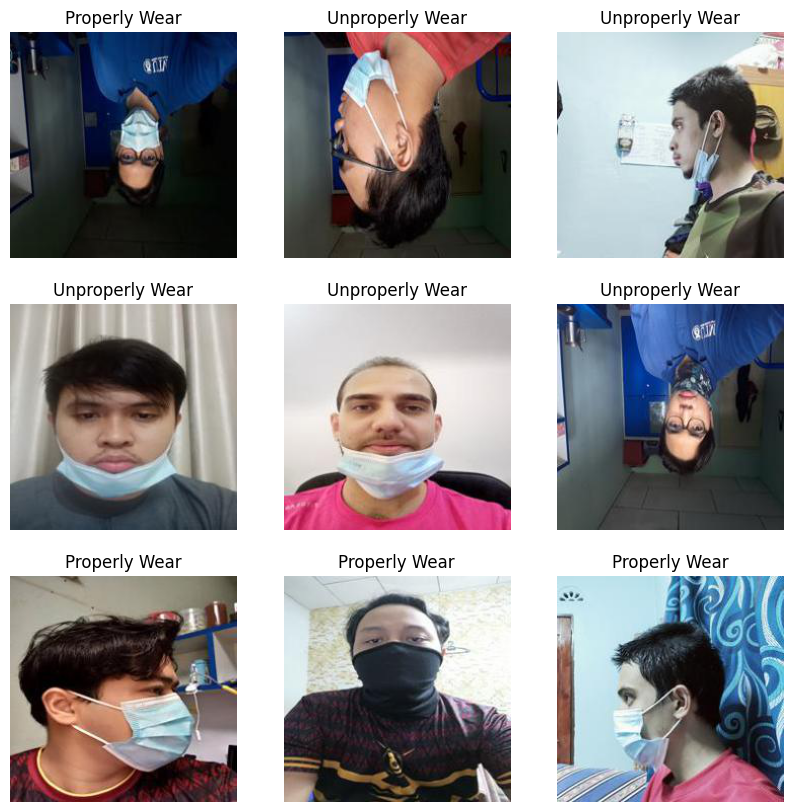

In [ ]:
import matplotlib.pyplot as plt

single_train_image_batch = train_batches.next()  #single_train_batch[0] -> image  single_train_batch [1] -> label
batch_images = single_train_image_batch[0]
batch_labels = single_train_image_batch[1]
print(batch_images.shape)
print(batch_labels.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(batch_images[i].astype("uint8"))
  plt.title(names[batch_labels[i].astype("int")])
  plt.axis("off")

#Create the base model from the pre-trained VGG16
First, instantiate a VGG16 model pre-loaded with weights trained on ImageNet.

In [ ]:
# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print("****VGG16 original network arhitecture****")
base_model.summary()

553467096/553467096 [==============================] - 7s 0us/step
****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                 

## Freeze all except last

In [ ]:
#Create our model by copying from the 1st layer to the 2nd last layer

model = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model.add(layer)

model1 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model1.add(layer)

model2 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model2.add(layer)

model3 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model3.add(layer)

model4 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model4.add(layer)

model5 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model5.add(layer)


In [ ]:
#Freezing the existing weights
for layer in model.layers:
    layer.trainable = False
print(model.summary())

for layer in model1.layers:
    layer.trainable = False
print(model1.summary())

for layer in model2.layers:
    layer.trainable = False
print(model2.summary())

for layer in model3.layers:
    layer.trainable = False
print(model3.summary())

for layer in model4.layers:
    layer.trainable = False
print(model4.summary())

for layer in model5.layers:
    layer.trainable = False
print(model5.summary())

#add new layer which will replace the previous VGG16 last layer
model.add(tf.keras.layers.Dense(2,name='Dense_Layer1'))
model1.add(tf.keras.layers.Dense(2,name='Dense_Layer1'))
model2.add(tf.keras.layers.Dense(2,name='Dense_Layer1'))
model3.add(tf.keras.layers.Dense(2,name='Dense_Layer1'))
model4.add(tf.keras.layers.Dense(2,name='Dense_Layer1'))
model5.add(tf.keras.layers.Dense(2,name='Dense_Layer1'))

print("****model after add new dense layer replacing the previous VGG16 last layer****")
model.summary()
model1.summary()
model2.summary()
model3.summary()
model4.summary()
model5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Train and test model with 70:30 ratio

In [ ]:
learning_rate = 0.01 #fix learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
39/39 [==============================] - 1759s 46s/step - loss: 0.6937 - accuracy: 0.4969 - val_loss: 0.6928 - val_accuracy: 0.5063
Epoch 2/5
39/39 [==============================] - 1504s 39s/step - loss: 0.6934 - accuracy: 0.4828 - val_loss: 0.6928 - val_accuracy: 0.5083
Epoch 3/5
39/39 [==============================] - 1471s 38s/step - loss: 0.6936 - accuracy: 0.4818 - val_loss: 0.6922 - val_accuracy: 0.5042
Epoch 4/5
39/39 [==============================] - 1468s 38s/step - loss: 0.6935 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5042
Epoch 5/5
39/39 [==============================] - 1468s 38s/step - loss: 0.6937 - accuracy: 0.4844 - val_loss: 0.6920 - val_accuracy: 0.5042


In [ ]:
# 70:30
test_loss, test_acc = model.evaluate(test_batches)

print('Test accuracy:', test_acc)

12/12 [==============================] - 367s 30s/step - loss: 0.6920 - accuracy: 0.5017
Test accuracy: 0.5016666650772095


Train and test model with 80:20 ratio

In [ ]:
history1 = model1.fit(train1_batches,
                    epochs=5,
                    validation_data=validation1_batches)

Epoch 1/5
39/39 [==============================] - 1001s 26s/step - loss: 4.2230 - accuracy: 0.6792 - val_loss: 4.1327 - val_accuracy: 0.6146
Epoch 2/5
39/39 [==============================] - 986s 25s/step - loss: 0.7699 - accuracy: 0.8521 - val_loss: 3.0477 - val_accuracy: 0.6292
Epoch 3/5
39/39 [==============================] - 968s 25s/step - loss: 0.2818 - accuracy: 0.9229 - val_loss: 3.0544 - val_accuracy: 0.6500
Epoch 4/5
39/39 [==============================] - 968s 25s/step - loss: 0.1534 - accuracy: 0.9552 - val_loss: 3.3958 - val_accuracy: 0.6417
Epoch 5/5
39/39 [==============================] - 982s 25s/step - loss: 0.3325 - accuracy: 0.9187 - val_loss: 4.0849 - val_accuracy: 0.6000


In [ ]:
# 80:20
test_loss, test_acc = model1.evaluate(test1_batches)

print('Test accuracy:', test_acc)

12/12 [==============================] - 255s 21s/step - loss: 1.6078 - accuracy: 0.7717
Test accuracy: 0.7716666460037231


Train and test model with 90:10 ratio

In [ ]:
history2 = model2.fit(train2_batches,
                    epochs=5,
                    validation_data=validation2_batches)

Epoch 1/5
44/44 [==============================] - 1452s 33s/step - loss: 0.0952 - accuracy: 0.9718 - val_loss: 2.8335 - val_accuracy: 0.6815
Epoch 2/5
44/44 [==============================] - 1467s 33s/step - loss: 0.0556 - accuracy: 0.9792 - val_loss: 3.3293 - val_accuracy: 0.6389
Epoch 3/5
44/44 [==============================] - 1467s 34s/step - loss: 0.1363 - accuracy: 0.9625 - val_loss: 3.2544 - val_accuracy: 0.6722
Epoch 4/5
44/44 [==============================] - 1465s 33s/step - loss: 0.1493 - accuracy: 0.9620 - val_loss: 3.7314 - val_accuracy: 0.6556
Epoch 5/5
44/44 [==============================] - 1462s 33s/step - loss: 0.1332 - accuracy: 0.9681 - val_loss: 3.9857 - val_accuracy: 0.6444


In [ ]:
# 90:10
test_loss, test_acc = model2.evaluate(test2_batches)

print('Test accuracy:', test_acc)

6/6 [==============================] - 158s 26s/step - loss: 1.4806 - accuracy: 0.8233
Test accuracy: 0.8233333230018616


###**Case 2: With and Without Augmentation**


In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentation options for training and validation
train_data_generator = ImageDataGenerator( validation_split=0.2,
                                          rotation_range = 20,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          )

In [ ]:
# Create the train batch generator >> Pick 1
##########  70:30  ##########
train3_batches = train_data_generator.flow_from_directory(
    '/content/output/train',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

train4_batches = train_data_generator.flow_from_directory(
    '/content/output/train1',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

train5_batches = train_data_generator.flow_from_directory(
    '/content/output/train2',
    target_size = (img_width,img_height),
    class_mode = 'sparse', #make label as integer value
    subset='training',
    batch_size = batch_size,
    shuffle = True,
    color_mode = "rgb",
    classes = names
)

Found 1680 images belonging to 2 classes.
Found 1920 images belonging to 2 classes.
Found 2160 images belonging to 2 classes.


In [ ]:
## using back the model in case 1
learning_rate = 0.01 #fix learning rate

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #70:30

model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #80:20

model5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) #90:10


In [ ]:
#70:30
history3 = model3.fit(train3_batches,
                    epochs=5,
                    validation_data=validation_batches) #70:30

Epoch 1/5
34/34 [==============================] - 1138s 33s/step - loss: 2.0049 - accuracy: 0.7208 - val_loss: 3.3146 - val_accuracy: 0.5857
Epoch 2/5
34/34 [==============================] - 1172s 35s/step - loss: 0.8565 - accuracy: 0.8393 - val_loss: 3.2158 - val_accuracy: 0.6500
Epoch 3/5
34/34 [==============================] - 1173s 35s/step - loss: 0.3762 - accuracy: 0.9149 - val_loss: 2.5547 - val_accuracy: 0.7000
Epoch 4/5
34/34 [==============================] - 1153s 34s/step - loss: 0.1944 - accuracy: 0.9429 - val_loss: 2.6956 - val_accuracy: 0.6810
Epoch 5/5
34/34 [==============================] - 1113s 33s/step - loss: 0.0895 - accuracy: 0.9649 - val_loss: 2.2660 - val_accuracy: 0.7000


In [ ]:
# test the module
test_loss, test_acc = model3.evaluate(test_batches) #70:30

print('Test accuracy:', test_acc)

18/18 [==============================] - 478s 27s/step - loss: 0.8752 - accuracy: 0.8578
Test accuracy: 0.8577777743339539


In [ ]:
#80:20
history4 = model4.fit(train4_batches,
                    epochs=5,
                    validation_data=validation1_batches) #80:20

Epoch 1/5
39/39 [==============================] - 992s 26s/step - loss: 0.9329 - accuracy: 0.8109 - val_loss: 2.4783 - val_accuracy: 0.6396
Epoch 2/5
39/39 [==============================] - 987s 25s/step - loss: 0.7840 - accuracy: 0.8161 - val_loss: 3.0964 - val_accuracy: 0.5875
Epoch 3/5
39/39 [==============================] - 985s 25s/step - loss: 1.0363 - accuracy: 0.8057 - val_loss: 3.7523 - val_accuracy: 0.5938
Epoch 4/5
39/39 [==============================] - 996s 26s/step - loss: 0.6920 - accuracy: 0.8464 - val_loss: 2.6336 - val_accuracy: 0.6542
Epoch 5/5
39/39 [==============================] - 999s 26s/step - loss: 0.7487 - accuracy: 0.8401 - val_loss: 3.5895 - val_accuracy: 0.5979


In [ ]:
# test the module
test_loss, test_acc = model4.evaluate(test1_batches) #80:20

print('Test accuracy:', test_acc)

12/12 [==============================] - 239s 20s/step - loss: 1.5288 - accuracy: 0.7883
Test accuracy: 0.7883333563804626


In [ ]:
#90:10
history5 = model5.fit(train5_batches,
                      epochs=5,
                      validation_data=validation2_batches) #90:10

Epoch 1/5
44/44 [==============================] - 1439s 33s/step - loss: 2.0060 - accuracy: 0.7227 - val_loss: 3.9045 - val_accuracy: 0.6093
Epoch 2/5
44/44 [==============================] - 1472s 34s/step - loss: 0.7048 - accuracy: 0.8639 - val_loss: 3.1512 - val_accuracy: 0.6241
Epoch 3/5
44/44 [==============================] - 1467s 34s/step - loss: 0.3849 - accuracy: 0.9139 - val_loss: 3.1348 - val_accuracy: 0.6574
Epoch 4/5
44/44 [==============================] - 1431s 33s/step - loss: 0.2211 - accuracy: 0.9398 - val_loss: 3.2109 - val_accuracy: 0.6778
Epoch 5/5
44/44 [==============================] - 1468s 34s/step - loss: 0.2403 - accuracy: 0.9375 - val_loss: 3.9922 - val_accuracy: 0.6241


In [ ]:
# test the module
test_loss, test_acc = model5.evaluate(test2_batches) #90:10

print('Test accuracy:', test_acc)

6/6 [==============================] - 159s 27s/step - loss: 1.3390 - accuracy: 0.8633
Test accuracy: 0.8633333444595337


###**Case 3: Freeze certain layer**

a) freezing parameters of all layers except last layer

b) freezing parameters of all layers except last and second layers

c) freezing parameters of all layers except last, second layers and third layers



In [ ]:
# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16()

# print(type(base_model))
print('\033[91m'+"****VGG16 original network arhitecture****"+'\033[0m')
base_model.summary()

#Create our model by copying from the 1st layer to the 2nd last layer

## Remove last layer
model_rmlast1 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-1]:
  model_rmlast1.add(layer)

## Remove last 2 layers
model_rmlast2 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-2]:
  model_rmlast2.add(layer)

## Remove last 3 layers
model_rmlast3 = tf.keras.models.Sequential()
for layer in base_model.layers[0:-3]:
  model_rmlast3.add(layer)

print('\033[91m'+"****model after copy all VGG16 layers and remove the last layer****"+'\033[0m')
model_rmlast1.summary()
print('\033[91m'+"****model after copy all VGG16 layers and remove the last 2 layers****"+'\033[0m')
model_rmlast2.summary()
print('\033[91m'+"****model after copy all VGG16 layers and remove the last 3 layers****"+'\033[0m')
model_rmlast3.summary()

****VGG16 original network arhitecture****
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxP

In [ ]:
#Freezing the existing weights
for layer in model_rmlast1.layers:
    layer.trainable = False
#print(model_rmlast1.summary())

for layer in model_rmlast2.layers:
    layer.trainable = False
#print(model_rmlast2.summary())

for layer in model_rmlast3.layers:
    layer.trainable = False
#print(model_rmlast3.summary())

#add new layer which will replace the previous VGG16 last layer
model_rmlast1.add(tf.keras.layers.Dense(2, name='dense_1'))

#add new layer which will replace the previous VGG16 last 2 layers
model_rmlast2.add(tf.keras.layers.Dense(2, name='dense_1'))
model_rmlast2.add(tf.keras.layers.Dense(2, name='dense_2'))

#add new layer which will replace the previous VGG16 last 3 layers
model_rmlast3.add(tf.keras.layers.Dense(2, name='dense_1'))
model_rmlast3.add(tf.keras.layers.Dense(2, name='dense_2'))
model_rmlast3.add(tf.keras.layers.Dense(2, name='dense_3'))


print('\033[91m'+"****model after add new dense layer replacing the previous VGG16 last layer****"+'\033[0m')
model_rmlast1.summary()
print('\033[91m'+"****model after add new dense layer replacing the previous VGG16 last 2 layers****"+'\033[0m')
model_rmlast2.summary()
print('\033[91m'+"****model after add new dense layer replacing the previous VGG16 last 3 layers****"+'\033[0m')
model_rmlast3.summary()

****model after add new dense layer replacing the previous VGG16 last layer****
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                        

Train and test model from case 3a

In [ ]:
learning_rate = 0.01 #fix learning rate
model_rmlast1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#70:30
history6 = model_rmlast1.fit(train_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
34/34 [==============================] - 1277s 38s/step - loss: 1.9219 - accuracy: 0.7202 - val_loss: 3.2994 - val_accuracy: 0.6024
Epoch 2/5
34/34 [==============================] - 1271s 38s/step - loss: 0.4485 - accuracy: 0.8786 - val_loss: 2.1837 - val_accuracy: 0.6857
Epoch 3/5
34/34 [==============================] - 1274s 38s/step - loss: 0.3663 - accuracy: 0.9048 - val_loss: 2.6793 - val_accuracy: 0.6952
Epoch 4/5
34/34 [==============================] - 1274s 38s/step - loss: 0.3354 - accuracy: 0.9077 - val_loss: 3.8378 - val_accuracy: 0.6095
Epoch 5/5
34/34 [==============================] - 1275s 38s/step - loss: 0.2927 - accuracy: 0.9298 - val_loss: 3.4339 - val_accuracy: 0.6595


In [ ]:
# 70:30
test_loss, test_acc = model_rmlast1.evaluate(test_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

18/18 [==============================] - 541s 30s/step - loss: 1.0654 - accuracy: 0.8533
Test accuracy: 0.8533333539962769


In [ ]:
# 80:20
history7 = model_rmlast1.fit(train1_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation1_batches)

Epoch 1/5
39/39 [==============================] - 1283s 33s/step - loss: 0.1776 - accuracy: 0.9500 - val_loss: 3.1863 - val_accuracy: 0.6292
Epoch 2/5
39/39 [==============================] - 1282s 33s/step - loss: 0.3240 - accuracy: 0.9234 - val_loss: 3.8724 - val_accuracy: 0.6146
Epoch 3/5
39/39 [==============================] - 1281s 33s/step - loss: 0.4383 - accuracy: 0.9120 - val_loss: 3.6658 - val_accuracy: 0.6833
Epoch 4/5
39/39 [==============================] - 1292s 33s/step - loss: 0.3035 - accuracy: 0.9380 - val_loss: 4.4190 - val_accuracy: 0.6729
Epoch 5/5
39/39 [==============================] - 1281s 33s/step - loss: 0.0914 - accuracy: 0.9740 - val_loss: 4.3730 - val_accuracy: 0.6438


In [ ]:
# 80:20
test_loss, test_acc = model_rmlast1.evaluate(test1_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

12/12 [==============================] - 319s 27s/step - loss: 1.3353 - accuracy: 0.8683
Test accuracy: 0.8683333396911621


In [ ]:
# 90:10
history8 = model_rmlast1.fit(train2_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation2_batches)

Epoch 1/5
44/44 [==============================] - 1519s 35s/step - loss: 3.6982 - accuracy: 0.6940 - val_loss: 3.9093 - val_accuracy: 0.5852
Epoch 2/5
44/44 [==============================] - 1516s 35s/step - loss: 0.5662 - accuracy: 0.8750 - val_loss: 2.9556 - val_accuracy: 0.6204
Epoch 3/5
44/44 [==============================] - 1504s 34s/step - loss: 0.2160 - accuracy: 0.9241 - val_loss: 2.0926 - val_accuracy: 0.7019
Epoch 4/5
44/44 [==============================] - 1498s 34s/step - loss: 0.1599 - accuracy: 0.9468 - val_loss: 2.6102 - val_accuracy: 0.6648
Epoch 5/5
44/44 [==============================] - 1498s 34s/step - loss: 0.1973 - accuracy: 0.9407 - val_loss: 3.7327 - val_accuracy: 0.6185


In [ ]:
# 90:10
test_loss, test_acc = model_rmlast1.evaluate(test2_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

6/6 [==============================] - 164s 27s/step - loss: 1.3385 - accuracy: 0.8000
Test accuracy: 0.800000011920929


Train and test model from case 3b

In [ ]:
learning_rate = 0.01 #fix learning rate
model_rmlast2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# 70:30
history9 = model_rmlast2.fit(train_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
34/34 [==============================] - 1143s 34s/step - loss: 4.2686 - accuracy: 0.7446 - val_loss: 5.0417 - val_accuracy: 0.6333
Epoch 2/5
34/34 [==============================] - 1174s 35s/step - loss: 0.5852 - accuracy: 0.9048 - val_loss: 3.5428 - val_accuracy: 0.6595
Epoch 3/5
34/34 [==============================] - 1141s 34s/step - loss: 0.2063 - accuracy: 0.9470 - val_loss: 3.4220 - val_accuracy: 0.6262
Epoch 4/5
34/34 [==============================] - 1184s 35s/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 2.4399 - val_accuracy: 0.6905
Epoch 5/5
34/34 [==============================] - 1141s 34s/step - loss: 0.0245 - accuracy: 0.9905 - val_loss: 2.3437 - val_accuracy: 0.6762


In [ ]:
# 70:30
test_loss, test_acc = model_rmlast2.evaluate(test_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

18/18 [==============================] - 489s 27s/step - loss: 0.8897 - accuracy: 0.8589
Test accuracy: 0.8588888645172119


In [ ]:
# 80:20
history10 = model_rmlast2.fit(train1_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation1_batches)

Epoch 1/5
39/39 [==============================] - 1315s 34s/step - loss: 0.0570 - accuracy: 0.9875 - val_loss: 2.4651 - val_accuracy: 0.6875
Epoch 2/5
39/39 [==============================] - 1308s 34s/step - loss: 0.0415 - accuracy: 0.9911 - val_loss: 2.3111 - val_accuracy: 0.7021
Epoch 3/5
39/39 [==============================] - 1304s 34s/step - loss: 0.0267 - accuracy: 0.9870 - val_loss: 2.2062 - val_accuracy: 0.6958
Epoch 4/5
39/39 [==============================] - 1304s 34s/step - loss: 0.0102 - accuracy: 0.9974 - val_loss: 2.5494 - val_accuracy: 0.6771
Epoch 5/5
39/39 [==============================] - 1301s 34s/step - loss: 0.0042 - accuracy: 0.9995 - val_loss: 2.6057 - val_accuracy: 0.6812


In [ ]:
# 80:20
test_loss, test_acc = model_rmlast2.evaluate(test1_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

12/12 [==============================] - 326s 27s/step - loss: 0.8425 - accuracy: 0.8750
Test accuracy: 0.875


In [ ]:
# 90:10
history11 = model_rmlast2.fit(train2_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation2_batches)

Epoch 1/5
44/44 [==============================] - 1490s 34s/step - loss: 0.0365 - accuracy: 0.9921 - val_loss: 2.6422 - val_accuracy: 0.6722
Epoch 2/5
44/44 [==============================] - 1493s 34s/step - loss: 0.0203 - accuracy: 0.9917 - val_loss: 2.4121 - val_accuracy: 0.6907
Epoch 3/5
44/44 [==============================] - 1558s 36s/step - loss: 0.0126 - accuracy: 0.9977 - val_loss: 2.6501 - val_accuracy: 0.6556
Epoch 4/5
44/44 [==============================] - 1536s 35s/step - loss: 0.0081 - accuracy: 0.9981 - val_loss: 2.6595 - val_accuracy: 0.6796
Epoch 5/5
44/44 [==============================] - 1493s 34s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.6847 - val_accuracy: 0.6796


In [ ]:
# 90:10
test_loss, test_acc = model_rmlast2.evaluate(test2_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

6/6 [==============================] - 163s 27s/step - loss: 1.0772 - accuracy: 0.8733
Test accuracy: 0.8733333349227905


Train and test model from case 3c

In [ ]:
learning_rate = 0.01 #fix learning rate
model_rmlast3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# 70:30
history12 = model_rmlast3.fit(train_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation_batches)

Epoch 1/5
34/34 [==============================] - 1137s 34s/step - loss: 28.4821 - accuracy: 0.7119 - val_loss: 11.2391 - val_accuracy: 0.5667
Epoch 2/5
34/34 [==============================] - 1167s 35s/step - loss: 1.2776 - accuracy: 0.9208 - val_loss: 7.7137 - val_accuracy: 0.6952
Epoch 3/5
34/34 [==============================] - 1168s 35s/step - loss: 0.2979 - accuracy: 0.9649 - val_loss: 7.8281 - val_accuracy: 0.6929
Epoch 4/5
34/34 [==============================] - 1172s 35s/step - loss: 0.0521 - accuracy: 0.9917 - val_loss: 7.2996 - val_accuracy: 0.6976
Epoch 5/5
34/34 [==============================] - 1169s 35s/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 7.1332 - val_accuracy: 0.7000


In [ ]:
# 70:30
test_loss, test_acc = model_rmlast3.evaluate(test_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

18/18 [==============================] - 486s 27s/step - loss: 2.7214 - accuracy: 0.8778
Test accuracy: 0.8777777552604675


In [ ]:
# 80:20
history13 = model_rmlast3.fit(train1_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation1_batches)

Epoch 1/5
39/39 [==============================] - 1295s 33s/step - loss: 0.1180 - accuracy: 0.9927 - val_loss: 6.6855 - val_accuracy: 0.7083
Epoch 2/5
39/39 [==============================] - 1300s 33s/step - loss: 0.0447 - accuracy: 0.9922 - val_loss: 6.8196 - val_accuracy: 0.7063
Epoch 3/5
39/39 [==============================] - 1322s 34s/step - loss: 0.0408 - accuracy: 0.9917 - val_loss: 7.2159 - val_accuracy: 0.6917
Epoch 4/5
39/39 [==============================] - 1299s 33s/step - loss: 0.0193 - accuracy: 0.9964 - val_loss: 7.4246 - val_accuracy: 0.6938
Epoch 5/5
39/39 [==============================] - 1298s 33s/step - loss: 0.0075 - accuracy: 0.9984 - val_loss: 7.8388 - val_accuracy: 0.6687


In [ ]:
# 80:20
test_loss, test_acc = model_rmlast3.evaluate(test1_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

12/12 [==============================] - 325s 27s/step - loss: 2.4723 - accuracy: 0.8967
Test accuracy: 0.8966666460037231


In [ ]:
# 90:10
history14 = model_rmlast3.fit(train2_batches, #depend on ratio
                    epochs=5,
                    validation_data=validation2_batches)

Epoch 1/5
44/44 [==============================] - 1635s 37s/step - loss: 4.9497 - accuracy: 0.9097 - val_loss: 34.4245 - val_accuracy: 0.6611
Epoch 2/5
44/44 [==============================] - 1608s 37s/step - loss: 0.9085 - accuracy: 0.9722 - val_loss: 36.2079 - val_accuracy: 0.6667
Epoch 3/5
44/44 [==============================] - 1605s 37s/step - loss: 0.3049 - accuracy: 0.9852 - val_loss: 31.9361 - val_accuracy: 0.6833
Epoch 4/5
44/44 [==============================] - 1606s 37s/step - loss: 0.1330 - accuracy: 0.9958 - val_loss: 38.5517 - val_accuracy: 0.6630
Epoch 5/5
44/44 [==============================] - 1608s 37s/step - loss: 0.0653 - accuracy: 0.9949 - val_loss: 33.4851 - val_accuracy: 0.6815


In [ ]:
# 90:10
test_loss, test_acc = model_rmlast3.evaluate(test2_batches) #depend on which ratio used

print('Test accuracy:', test_acc)

6/6 [==============================] - 179s 30s/step - loss: 11.4700 - accuracy: 0.9033
Test accuracy: 0.903333306312561


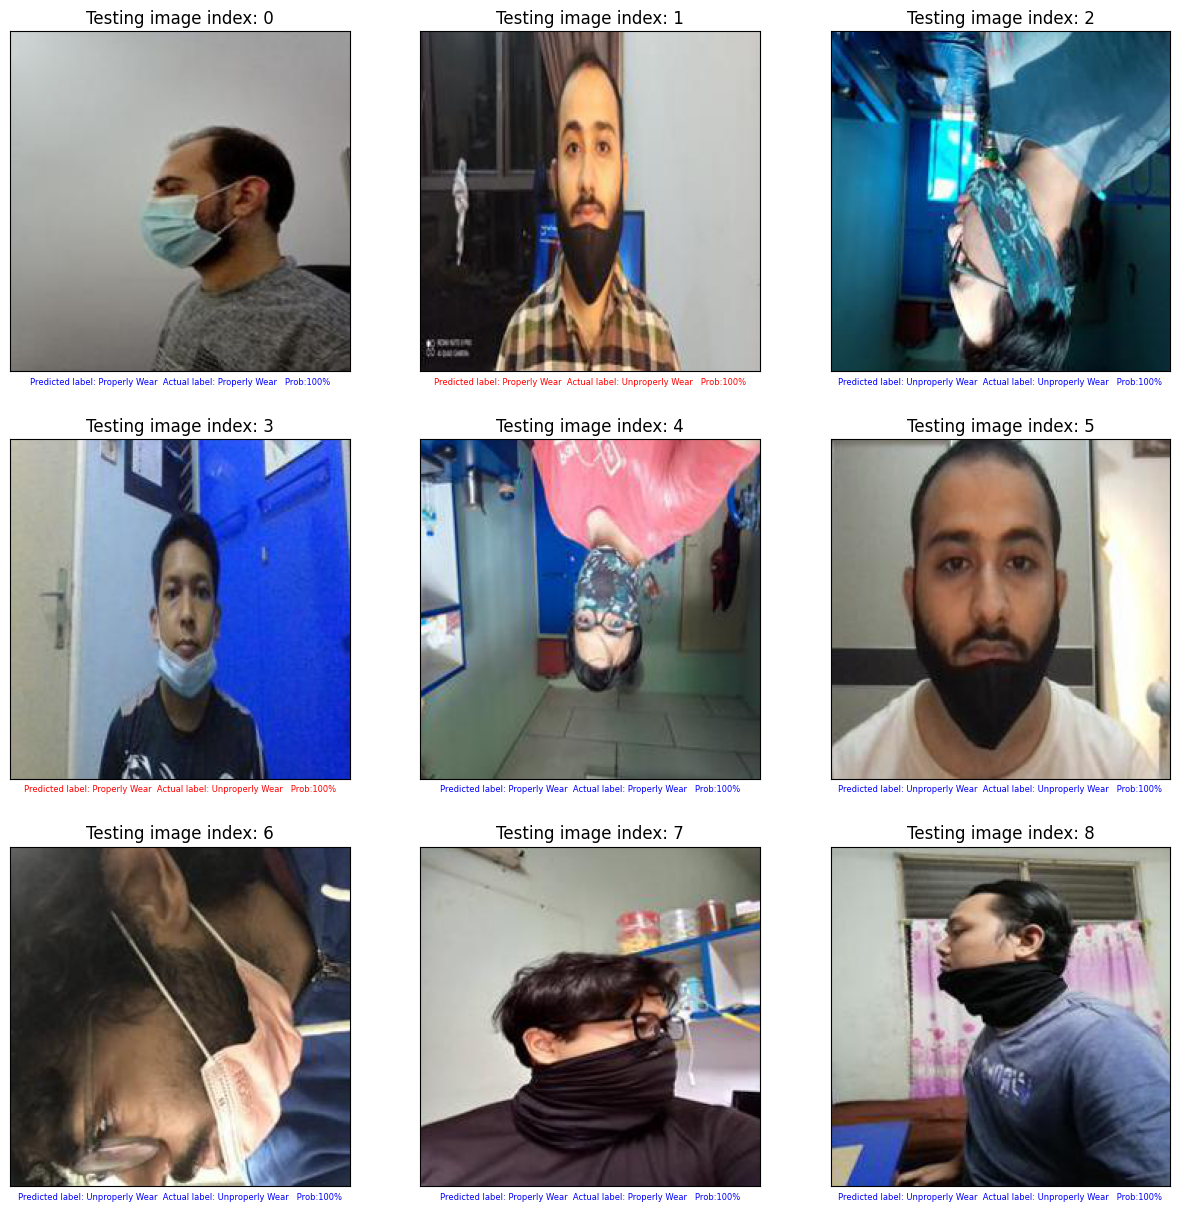

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i].astype("uint8"), img[i].astype("uint8")
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array[i])

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Predicted label: {}  Actual label: {}   Prob:{:2.0f}%".format(names[predicted_label],
                                names[true_label],
                                100*np.max(predictions_array)),
                                fontsize=6,
                                color=color)


single_test_image_batch = test2_batches.next()
predicted_label_prob = model_rmlast3(single_test_image_batch[0]) # single_test_image_batch[0] -> batches of images; single_test_image_batch[1] -> batches of label
predicted_label_prob = tf.nn.softmax(predicted_label_prob)


plt.figure(figsize=(15, 15))
for index in range(9):
  ax = plt.subplot(3, 3, index + 1)
  plot_image(index,predicted_label_prob,single_test_image_batch[1],single_test_image_batch[0])
  plt.title("Testing image index: {}".format(index))

## Chapter 3: Discussion
#**Case 1**

The accuracy of:

70:30 without data augmentation is 50.17%

80:20 without data augmentation is 77.17%

90:10 without data augmentation is 82.33%


#**Case 2**

The accuracy of:

70:30 with data augmentation is 85.78%

80:20 with data augmentation is 78.83%

90:10 with data augmentation is 86.33%

Generally, the accuracy in Case 2 is higher as compared to Case 1. This is bacause data augmentation increase the diversity of the datasets, thus improving the performance of the model.

#**Case 3**

The accuracy of:

**70:30**

a) freeze all except last layer is 85.33%

b) freeze all except last 2 layers is 85.89%

c) freeze all except last 3 layers is 87.78%

**80:20**

a) freeze all except last layer is 86.83%

b) freeze all except last 2 layers is 87.50%

c) freeze all except last 3 layers is 89.67%

**90:10**

a) freeze all except last layer is 80.00%

b) freeze all except last 2 layers is 87.33%

c) freeze all except last 3 layers is 90.33%

From Case 3, we can see that the performace of the model is higher when there is more trainable layers. However, the training time is also relatively longer.


## Chapter 4: Conclusion

The two objectives of this assignment have been achieved successfully. An automated classification algorithm based on CNN with VGG16 as pre-trained model has been developed to classify images of person wearing mask into properly wear and unproperly wear. In this assignment, several models are developed with different ratio of training and testing data, data augmentation and freezing and the results are compared as shown in discussion part. From this assignment, we have learnt that data augmentation is used to increase the diversity in datasets by artificially inducing variations into training set, thus improving the performance of the models. As for freezing, it is to fix the weight of trainable layers and reduce the training time.

## References
1)[1] Yamashita, R., Nishio, M., Do, R.K.G. et al. Convolutional neural networks: an overview and application in radiology. Insights Imaging 9, 611–629 (2018). https://doi.org/10.1007/s13244-018-0639-9

[2] Sarker, I.H. Deep Learning: A Comprehensive Overview on Techniques, Taxonomy, Applications and Research Directions. SN COMPUT. SCI. 2, 420 (2021). https://doi.org/10.1007/s42979-021-00815-1

[3] Brownlee, J. (2019) A gentle introduction to transfer learning for Deep learning, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/transfer-learning-for-deep-learning/

[4] B R, Nanditha & Annegowda, Geetha & S, Chandrashekar & S, Dinesh & S, Murali. (2021). An Ensemble Deep Neural Network Approach for Oral Cancer Screening. International Journal of Online and Biomedical Engineering (iJOE). 17. 121. 10.3991/ijoe.v17i02.19207.

[5] Awan, A.A. (2022) A complete guide to data augmentation, DataCamp. Available at: https://www.datacamp.com/tutorial/complete-guide-data-augmentation